<a href="https://colab.research.google.com/github/Joce05/ObesityPrediction/blob/main/Obesity_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Data

In [2]:
df = pd.read_csv('obesity_data.csv')

In [3]:
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


# Clean the Data


In [5]:
df.isna().any()

,0
Age,False
Gender,False
Height,False
Weight,False
BMI,False
PhysicalActivityLevel,False
ObesityCategory,False


In [6]:
df.isna().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
BMI,0
PhysicalActivityLevel,0
ObesityCategory,0


# Data Exploration and Visualization

In [7]:
df.describe()

,Age,Height,Weight,BMI,PhysicalActivityLevel
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.857000,170.052417,71.205769,24.888317,2.534000
std,18.114267,10.309971,15.509849,6.193912,1.116284
min,18.000000,136.115719,26.065730,8.470572,1.000000
25%,35.000000,163.514205,61.129629,20.918068,2.000000
50%,50.000000,169.801665,71.929072,24.698647,3.000000
75%,66.000000,177.353596,81.133746,28.732132,4.000000
max,79.000000,201.419670,118.907366,50.791898,4.000000


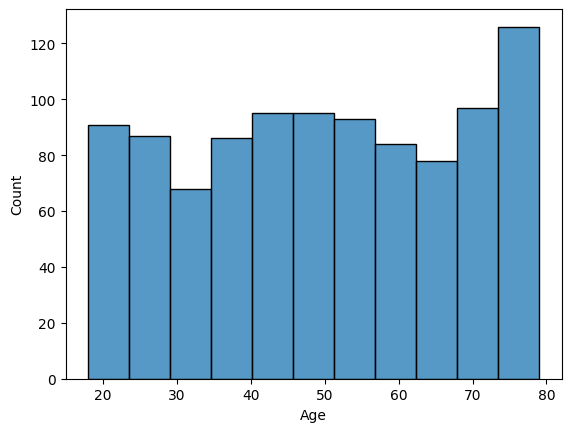

In [8]:
sns.histplot(data=df, x="Age")
plt.show()


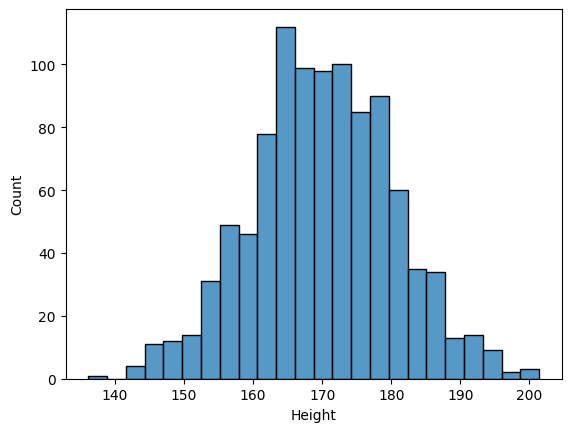

In [10]:
sns.histplot(data=df, x="Height")
plt.show()

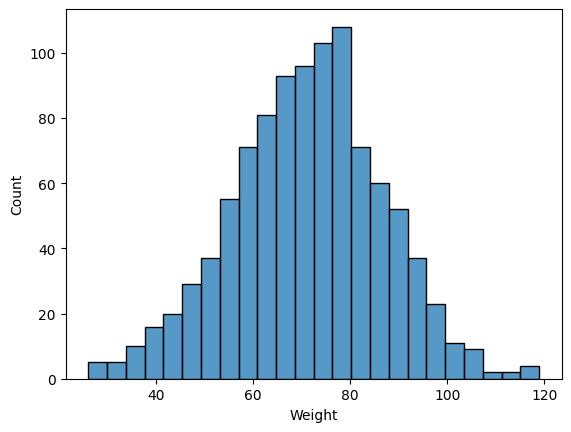

In [11]:
sns.histplot(data=df, x="Weight")
plt.show()

<ipython-input-14-f1f3376870d5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df, palette="Set2")


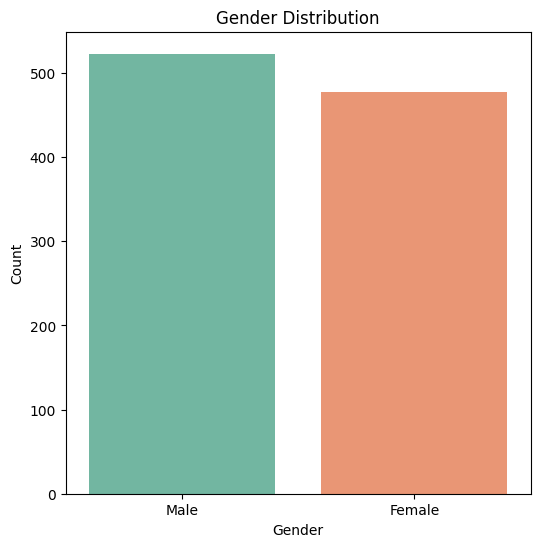

In [14]:
plt.figure(figsize=(6, 6))  # Setting the figure size
sns.countplot(x="Gender", data=df, palette="Set2")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")
plt.show()

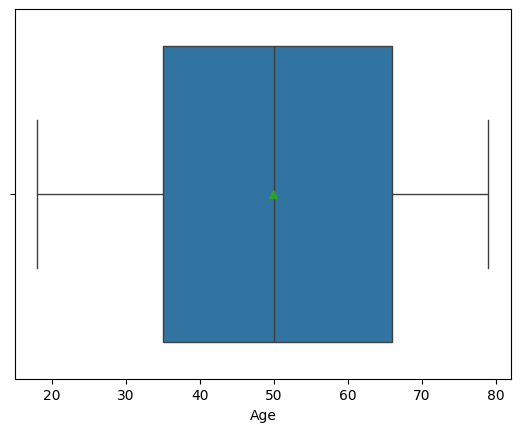

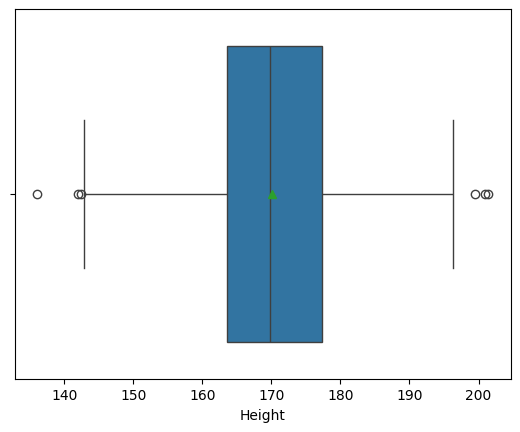

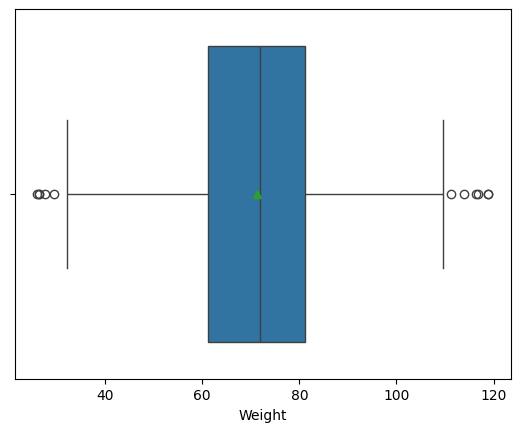

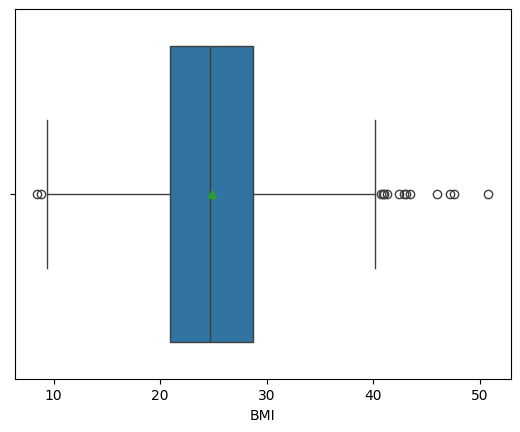

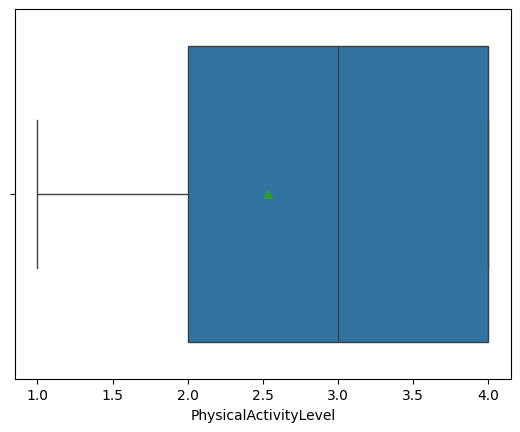

In [16]:
# Getting the list of numeric columns (excluding categorical ones like Gender)
cols = ["Age", "Height", "Weight", "BMI", "PhysicalActivityLevel"]

for col in cols:
    sns.boxplot(x = col, showmeans=True, data=df)
    plt.show()

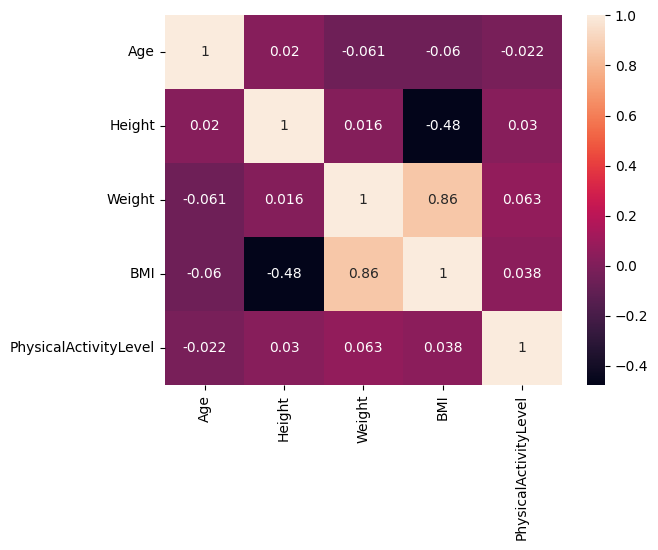

In [18]:
corr = df.drop(["Gender", "ObesityCategory"], axis=1).corr()
g = sns.heatmap(corr, annot=True)

# Models

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


# Random Forest

Average Accuracy: 99.80%
Average Confusion Matrix:
[[28.4  0.2  0.   0. ]
 [ 0.2 74.   0.   0. ]
 [ 0.   0.  59.   0. ]
 [ 0.   0.   0.  38.2]]


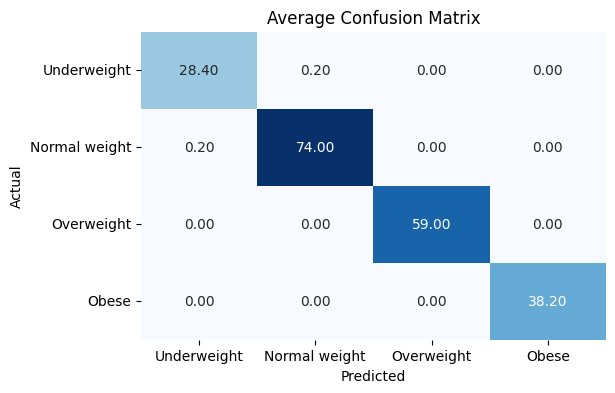

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

X = df.drop(['ObesityCategory', "Weight", "Height"], axis=1)
X["Gender"] = [1 if i == "Male" else 0 for i in X["Gender"]]

# Create a mapping dictionary
mapping = {'Underweight': 0, 'Normal weight': 1, 'Overweight': 2, 'Obese': 3}

# Use the map function to apply the mapping
y = df['ObesityCategory'].map(mapping)

# Create a StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize an empty list to store the accuracy scores
accuracies_random_forest = []

# Initialize an empty list to store the confusion matrices
conf_matrices = [] # Initialize conf_matrices here

# Loop through the folds
for train_index, test_index in skf.split(X, y):
    # Split the data into training and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  # Create an instance of the Random Forest classifier
    model = RandomForestClassifier(random_state=42)

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the accuracy ofthe model
    accuracy = accuracy_score(y_test, y_pred)

    # Add the accuracy to the list
    accuracies_random_forest.append(accuracy)

    # Calculate the confusion matrix and add it to the list
    conf_matrix = confusion_matrix(y_test, y_pred) # Indent this line to be inside the loop
    conf_matrices.append(conf_matrix)


# Compute the mean accuracy
accuracy_score_avg_rf = np.mean(accuracies_random_forest)

print("Average Accuracy: %.2f%%" % (accuracy_score_avg_rf * 100.0))

# Calculate the average confusion matrix across all folds
avg_conf_matrix_rf = np.mean(conf_matrices, axis=0)
print("Average Confusion Matrix:")
print(avg_conf_matrix_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(avg_conf_matrix_rf, annot=True, fmt='.2f', cmap='Blues', cbar=False,
            xticklabels=mapping.keys(), yticklabels=mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Average Confusion Matrix")
plt.show()

# KNN

Average Accuracy: 91.60%
Average Confusion Matrix:
[[27.1  1.5  0.   0. ]
 [ 1.  70.9  2.3  0. ]
 [ 0.   0.9 57.2  0.9]
 [ 0.   0.   2.  36.2]]


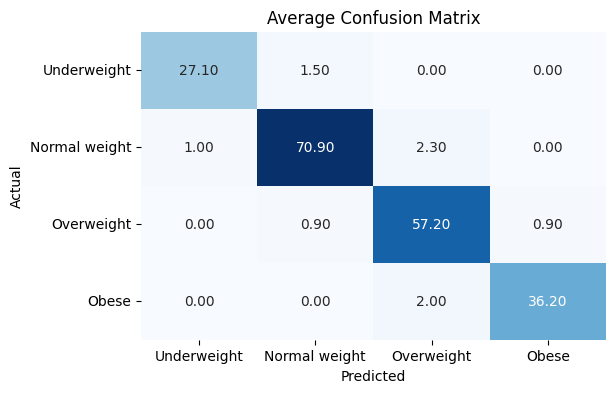

In [37]:
X = df.drop(['ObesityCategory', "Weight", "Height"], axis=1)
X["Gender"] = [1 if i == "Male" else 0 for i in X["Gender"]]

# Create a mapping dictionary
mapping = {'Underweight': 0, 'Normal weight': 1, 'Overweight': 2, 'Obese': 3}

# Use the map function to apply the mapping
y = df['ObesityCategory'].map(mapping)

# Create a StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize an empty list to store the accuracy scores
accuracies_knn = []

# Loop through the folds
for train_index, test_index in skf.split(X, y):
    # Split the data into training and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

     # Create an instance of the KNN classifier
    model = KNeighborsClassifier()

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    # Add the accuracy to the list
    accuracies_knn.append(accuracy)

    # Calculate the confusion matrix and add it to the list
    conf_matrix = confusion_matrix(y_test, y_pred) # Indent this line to be inside the loop
    conf_matrices.append(conf_matrix)

# Compute the mean accuracy
accuracy_score_avg_knn = np.mean(accuracies_knn)

print("Average Accuracy: %.2f%%" % (accuracy_score_avg_knn * 100.0))

# Calculate the average confusion matrix across all folds
avg_conf_matrix_knn = np.mean(conf_matrices, axis=0)
print("Average Confusion Matrix:")
print(avg_conf_matrix_knn)

plt.figure(figsize=(6, 4))
sns.heatmap(avg_conf_matrix_knn, annot=True, fmt='.2f', cmap='Blues', cbar=False,
            xticklabels=mapping.keys(), yticklabels=mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Average Confusion Matrix")
plt.show()

# Decission Tree

Average Accuracy: 99.80%
Average Confusion Matrix:
[[27.53333333  1.06666667  0.          0.        ]
 [ 0.73333333 71.93333333  1.53333333  0.        ]
 [ 0.          0.6        57.8         0.6       ]
 [ 0.          0.          1.33333333 36.86666667]]


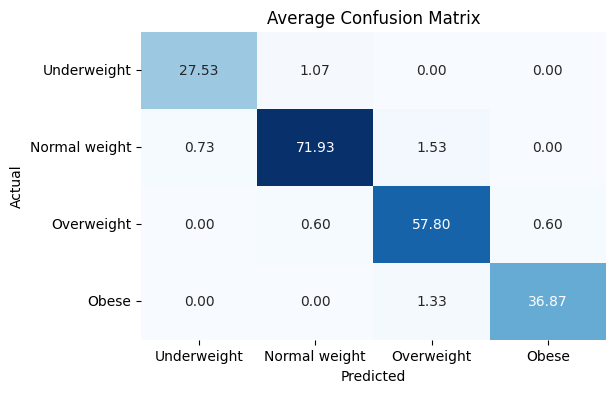

In [38]:
X = df.drop(['ObesityCategory', "Weight", "Height"], axis=1)
X["Gender"] = [1 if i == "Male" else 0 for i in X["Gender"]]

# Create a mapping dictionary
mapping = {'Underweight': 0, 'Normal weight': 1, 'Overweight': 2, 'Obese': 3}

# Use the map function to apply the mapping
y = df['ObesityCategory'].map(mapping)

# Create a StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize an empty list to store the accuracy scores
accuracies_decision_tree = []

# Loop through the folds
for train_index, test_index in skf.split(X, y):
    # Split the data into training and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create an instance of the Decision Tree classifier
    model = DecisionTreeClassifier()

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    # Add the accuracy to the list
    accuracies_decision_tree.append(accuracy)

    # Calculate the confusion matrix and add it to the list
    conf_matrix = confusion_matrix(y_test, y_pred) # Indent this line to be inside the loop
    conf_matrices.append(conf_matrix)

# Compute the mean accuracy
accuracy_score_avg_dt = np.mean(accuracies_decision_tree)

print("Average Accuracy: %.2f%%" % (accuracy_score_avg_dt * 100.0))

# Calculate the average confusion matrix across all folds
avg_conf_matrix_dt = np.mean(conf_matrices, axis=0)
print("Average Confusion Matrix:")
print(avg_conf_matrix_dt)

plt.figure(figsize=(6, 4))
sns.heatmap(avg_conf_matrix_dt, annot=True, fmt='.2f', cmap='Blues', cbar=False,
            xticklabels=mapping.keys(), yticklabels=mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Average Confusion Matrix")
plt.show()

# Plot The Accuracy of the 3 Models

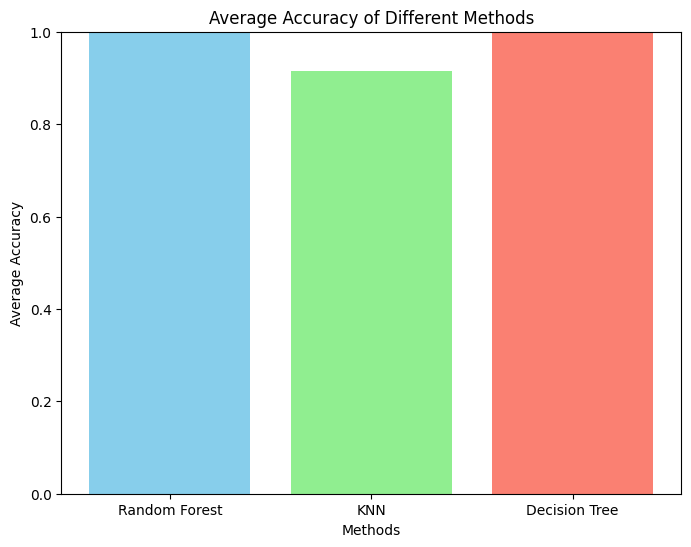

In [39]:
# Plot the accuracies
methods = ['Random Forest', 'KNN', 'Decision Tree']
accuracies = [accuracy_score_avg_rf, accuracy_score_avg_knn, accuracy_score_avg_dt]

plt.figure(figsize=(8, 6))
plt.bar(methods, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Methods')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy of Different Methods')
plt.ylim(0, 1)  # Assuming accuracy values are between 0 and 1
plt.show()